In [1]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
import matplotlib.pyplot as plt

In [2]:
data = load_waltons()
print(data.head())

      T  E    group
0   6.0  1  miR-137
1  13.0  1  miR-137
2  13.0  1  miR-137
3  13.0  1  miR-137
4  19.0  1  miR-137


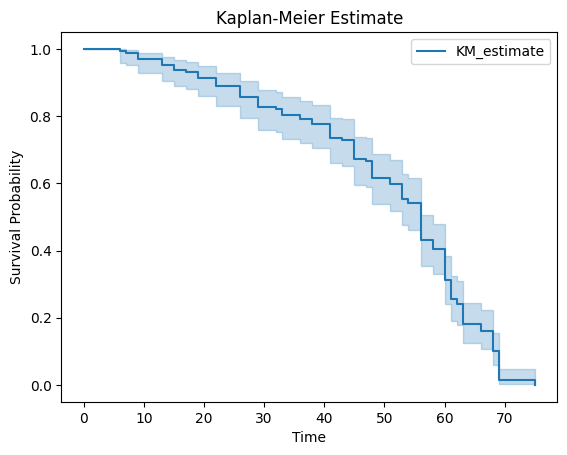

In [3]:
kmf = KaplanMeierFitter()

# Fitting the data
kmf.fit(durations=data['T'], event_observed=data['E'])

# Plotting the survival function
kmf.plot_survival_function()
plt.title('Kaplan-Meier Estimate')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.show()

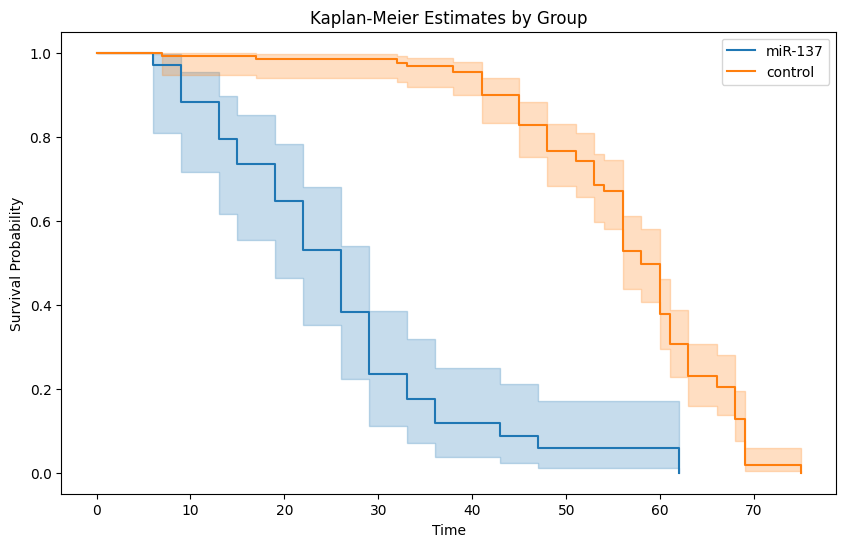

In [4]:
groups = data['group'].unique()

# Initialize the plot
plt.figure(figsize=(10, 6))

for group in groups:
    group_data = data[data['group'] == group]
    kmf.fit(durations=group_data['T'], event_observed=group_data['E'], label=group)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Estimates by Group')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

In [5]:
from lifelines.statistics import logrank_test

group1 = data[data['group'] == 'control']
group2 = data[data['group'] == 'miR-137']

results = logrank_test(group1['T'], group2['T'], event_observed_A=group1['E'], event_observed_B=group2['E'])
print(results)

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         122.25 <0.005     91.99


In [6]:
from lifelines import CoxPHFitter

# Preparing the data for the Cox model
data['group'] = data['group'].astype('category').cat.codes  # Convert group to numerical codes

cph = CoxPHFitter()
cph.fit(data, duration_col='T', event_col='E')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 163 total observations, 7 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 163
number of events observed = 156
   partial log-likelihood = -613.18
         time fit was run = 2024-05-24 08:41:04 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
group      2.05      7.79      0.22            1.63            2.48                5.09               11.91

           cmp to    z      p  -log2(p)
covariate                              
group        0.00 9.46 <0.005     68.14
---
Concordance = 0.66
Partial AIC = 1228.36
log-likelihood ratio test = 66.25 on 1 df
-log2(p) of ll-ratio test = 51.16